In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import plotly.subplots 
from scipy.stats import pearsonr

In [2]:
# Define path and read appropriate dataset: individual.csv
file_path = 'Individual.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         10668 non-null  object 
 1   Survey Data       10668 non-null  object 
 2   Well-being        10668 non-null  float64
 3   Needs             10668 non-null  float64
 4   Engagement        10668 non-null  float64
 5   Autonomy          10668 non-null  float64
 6   Belonging         10668 non-null  float64
 7   Competence        10668 non-null  float64
 8   Leadership        10668 non-null  float64
 9   Management        10668 non-null  float64
 10  Returns           10668 non-null  float64
 11  Rewards           10668 non-null  float64
 12  Status            10668 non-null  float64
 13  Myself            10668 non-null  int64  
 14  Tasks             10668 non-null  int64  
 15  Free              10668 non-null  int64  
 16  Mastery           10668 non-null  int64 

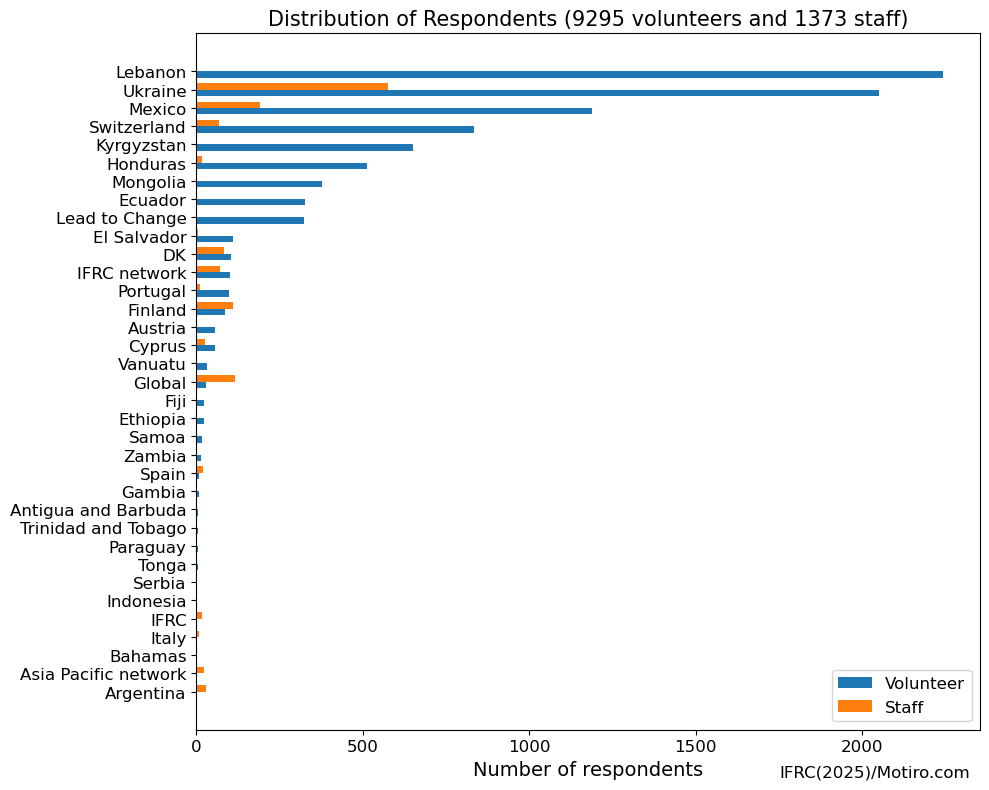

In [6]:
## distribution of respondents by country and position

# Read appropriate dataframe as defined in cell 2
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Region == 'corporate'].index)
df = df.drop(df[df.Region == 'test'].index)
#df = df.drop(df[df.Region == 'DK'].index)

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()

# Group the dataframe by 'Country' and calculate the sum of 'Volunteer' and 'Staff'
grouped_df = df.groupby('Country').agg({'Volunteer': 'sum', 'Staff': 'sum'}).sort_values('Volunteer', ascending=True)


# Get the list of countries
countries = grouped_df.index

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height, label='Volunteer')

# Plot the bars for staff
ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height / 2)


ax.set_yticklabels(countries, fontdict={'size': 12})
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
ax.tick_params(axis='x', labelsize=12)

# Set the x-axis label
ax.set_xlabel('Number of respondents', fontdict={'size': 14})

# Set the title
ax.set_title(f'Distribution of Respondents ({n_vol} volunteers and {n_staff} staff)', fontdict={'size': 15})
plt.text(1750, -4.5, "IFRC(2025)/Motiro.com", fontdict={'size': 12})

# Add a legend
ax.legend(fontsize=12)

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('RespondentsByCountrySorted.png')
# Show the plot
plt.show()


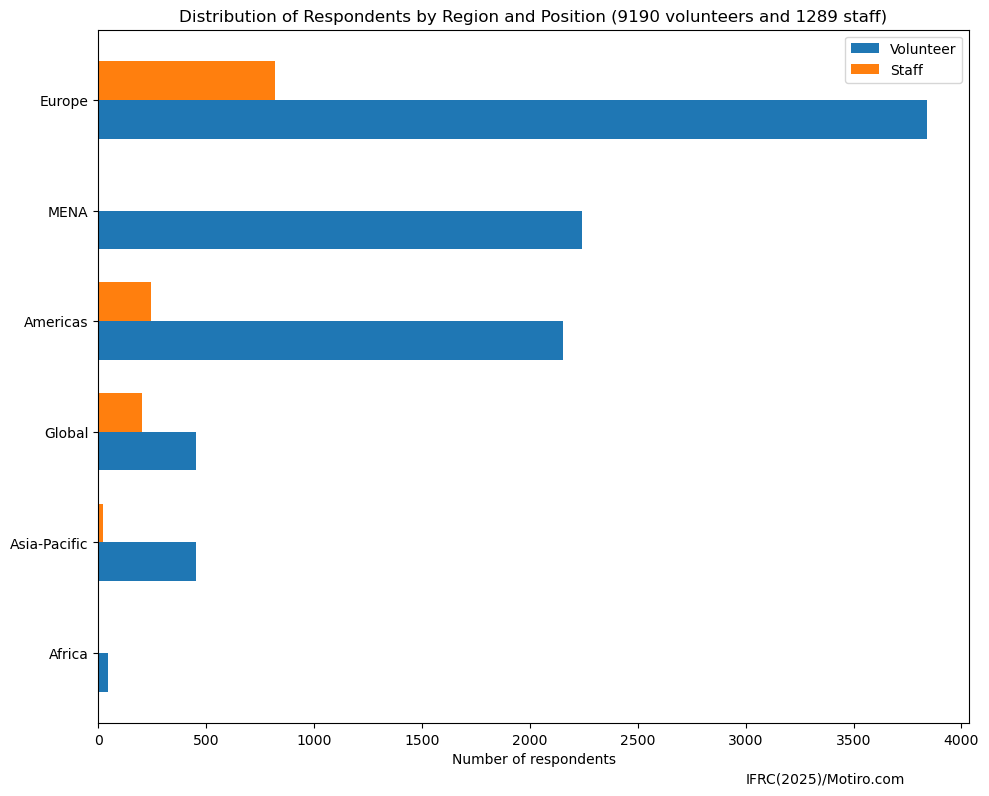

In [7]:
## distribution of respondents by region and position

# Read appropriate dataframe as defined in cell 2
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Region == 'corporate'].index)
df = df.drop(df[df.Region == 'test'].index)
df = df.drop(df[df.Region == 'DK'].index)

# Count the total number of respondents (n)
n_vol = df['Volunteer'].sum()
n_staff = df['Staff'].sum()

# Group the dataframe by 'Region' and calculate the sum of 'Volunteer' and 'Staff'
grouped_df = df.groupby('Region').agg({'Volunteer': 'sum', 'Staff': 'sum'}).sort_values('Volunteer', ascending=True)


# Get the list of countries
countries = grouped_df.index

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height, label='Volunteer')

# Plot the bars for staff
ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(countries)

# Set the x-axis label
ax.set_xlabel('Number of respondents')

# Set the title
ax.set_title(f'Distribution of Respondents by Region and Position ({n_vol} volunteers and {n_staff} staff)')
plt.text(3000, -1, "IFRC(2025)/Motiro.com", fontdict={'size': 10})

# Add a legend
ax.legend()

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('RespondentsByRegionSorted.png')
# Show the plot
plt.show()


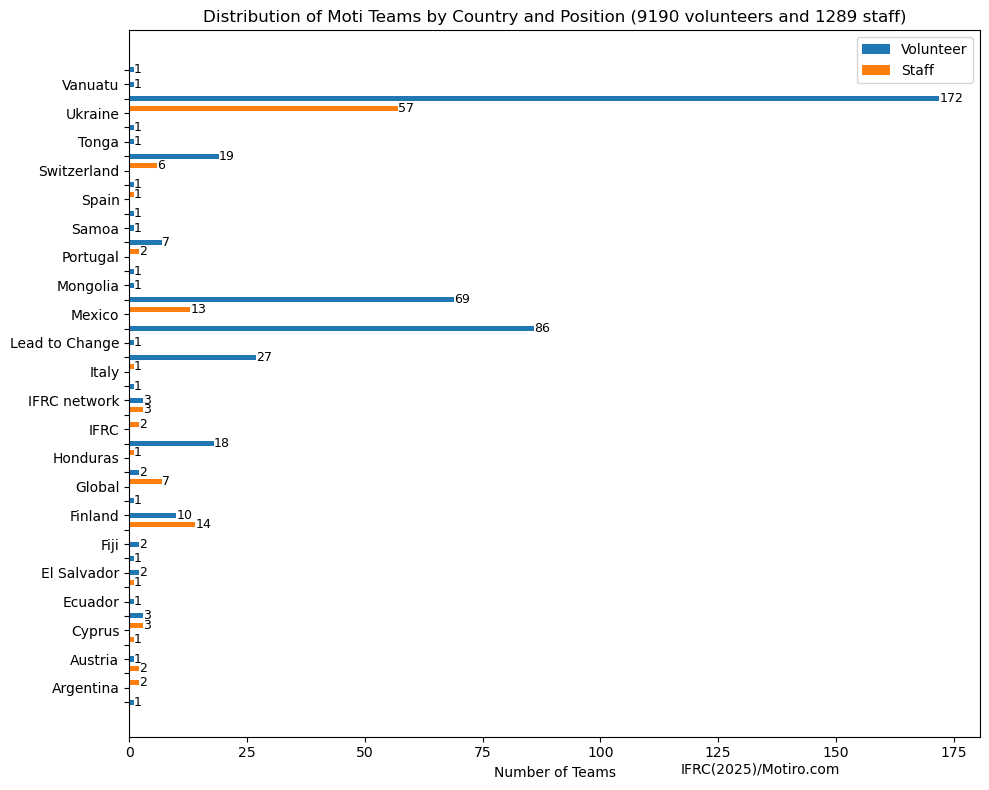

In [8]:
# bar chart with number of teams by country

# Read appropriate dataframe as defined in cell 2
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Region == 'corporate'].index)
df = df.drop(df[df.Region == 'test'].index)
df = df.drop(df[df.Region == 'DK'].index)

# Group the dataframe by 'country' and 'Position', and count the number of unique 'Team Name' occurrences
grouped_df = df.groupby(['Country', 'Position']).agg({'Team Name': 'nunique'})

# Reset the index to make 'country' and 'Position' regular columns
grouped_df = grouped_df.reset_index()

# Get the list of countries
countries = grouped_df['Country']

# Get the unique positions
positions = grouped_df['Position'].unique()

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
volunteer_bars = []
for i, position in enumerate(positions):
    values = np.zeros(len(countries))
    mask = (grouped_df['Position'] == position) & (grouped_df['Country'].isin(countries))
    values[mask] = grouped_df[mask]['Team Name']
    bars = ax.barh(y + (i * bar_height), values, height=bar_height, label=position, )
    volunteer_bars.append(bars)

# Set the y-axis ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(countries)

# Display country labels only once
for i, label in enumerate(ax.get_yticklabels()):
    if i % len(positions) != 1:
        label.set_visible(False)

# Set the x-axis label
ax.set_xlabel('Number of Teams')

# Set the title
ax.set_title(f'Distribution of Moti Teams by Country and Position ({n_vol} volunteers and {n_staff} staff)')
plt.text(117, -5, "IFRC(2025)/Motiro.com", fontdict={'size': 10})

# Add labels to the bars
for bars in volunteer_bars:
    for bar in bars:
        value = bar.get_width()
        if value > 0:
            ax.text(value, bar.get_y() + bar.get_height() / 2, str(int(value)),
                    ha='left', va='center', fontsize=9)

# Add a legend
ax.legend(positions)

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('TeamsByCountry.png')
# Show the plot
plt.show()


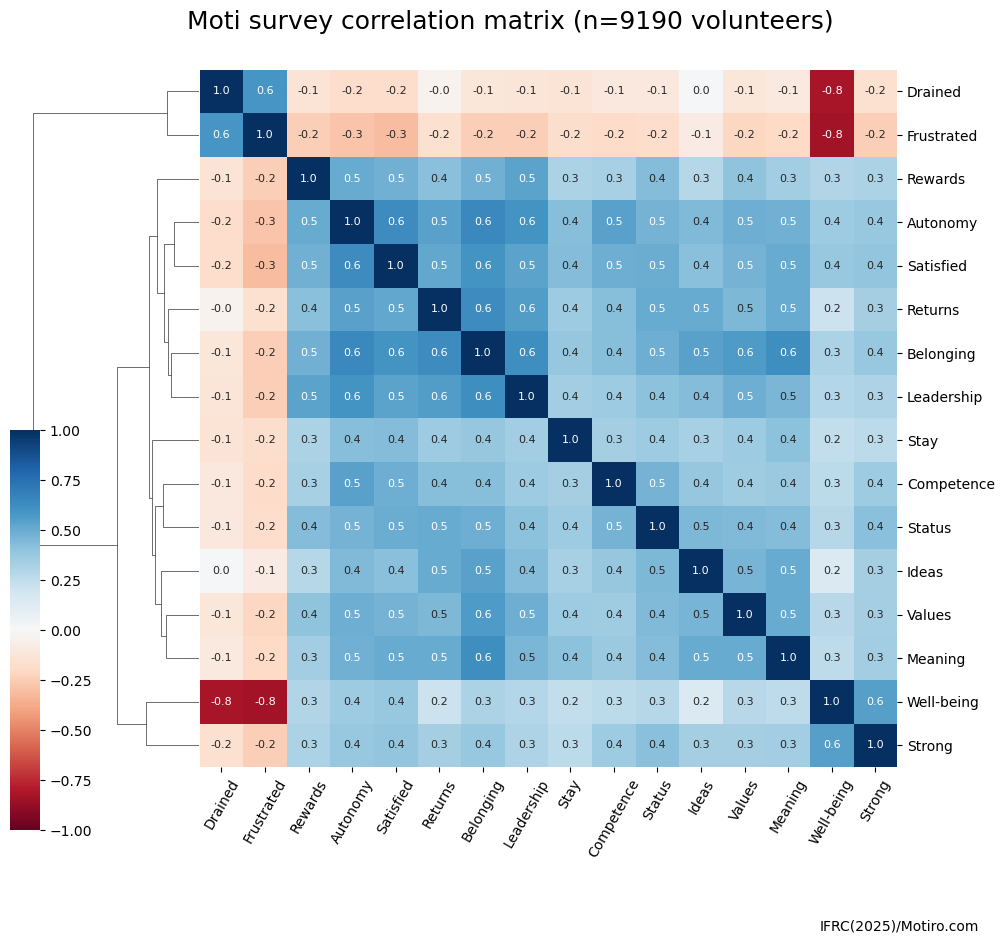

In [9]:
# Summary correlation matrix with grouped scores VOLUNTEERS

# Read appropriate dataframe as defined in cell 2
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']

# Count the total number of volunteers (n)
n_VOL = df['Volunteer'].sum()


columns = ['Well-being',
           'Ideas',
           'Values',
           'Meaning',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'Moti survey correlation matrix (n={n_VOL} volunteers)',
             x=0.5, y=0.87, fontsize=18)
plt.text(27, -1.5, "IFRC(2025)/Motiro.com")

# Show the plot
plt.savefig('VOL Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


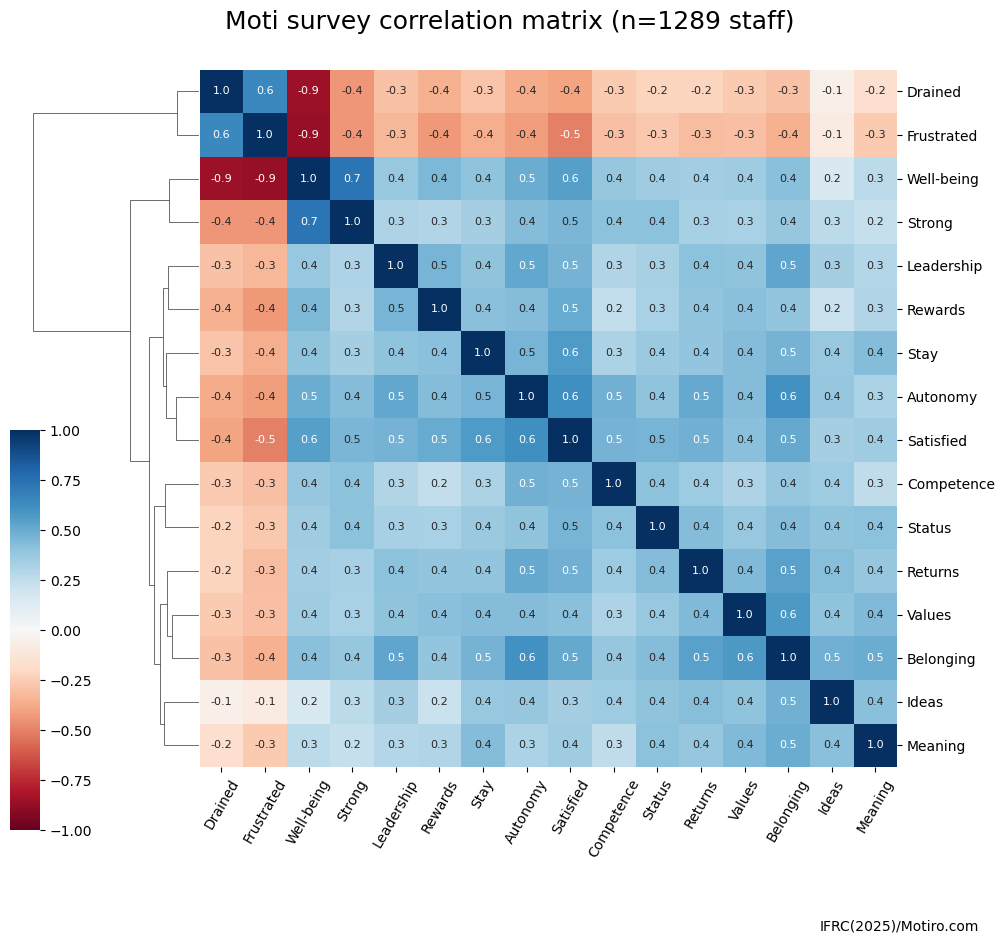

In [10]:
# Staff - Summary correlation matrix with grouped scores

# Read appropriate dataframe as defined in cell 2
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Volunteer']

# Filter the dataframe for 'Position' = 'Staff'
df = df[df['Position'] == 'Staff']

# Create a figure with two subplots
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))


# Count the total number of respondents (n)
n_VOL = df['Volunteer'].sum()
#n = df['Staff'].sum()
n_STAFF = df['Staff'].sum()

columns = ['Well-being',
           'Ideas',
           'Values',
           'Meaning',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'Moti survey correlation matrix (n={n_STAFF} staff)',
             x=0.5, y=0.87, fontsize=18)
plt.text(27, -1.5, "IFRC(2025)/Motiro.com")

# Show the plot
plt.savefig('Staff Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


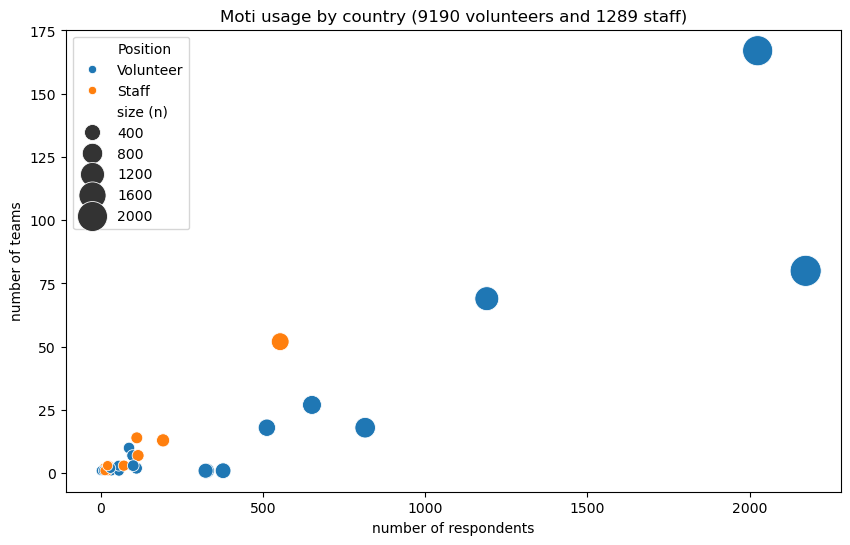

In [11]:
# SNS SCATTER PLOT COMPARING TEAM SIZES FOR STAFF AND VOLUNTEER - BY COUNTRY

# Read appropriate dataframe as defined in cell 2
file_path = 'Country.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)
  
# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the bubble graph with Seaborn.objects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='size (n)', y='nTeams', size='size (n)', hue='Position',
                sizes=(50, 500))

# Set the labels and title
plt.xlabel('number of respondents')
plt.ylabel('number of teams')
plt.title(f'Moti usage by country ({n_vol} volunteers and {n_staff} staff)')

# Show the legend
plt.legend()

# Save and show the plot
plt.savefig('Moti_by_country.png')
plt.show()

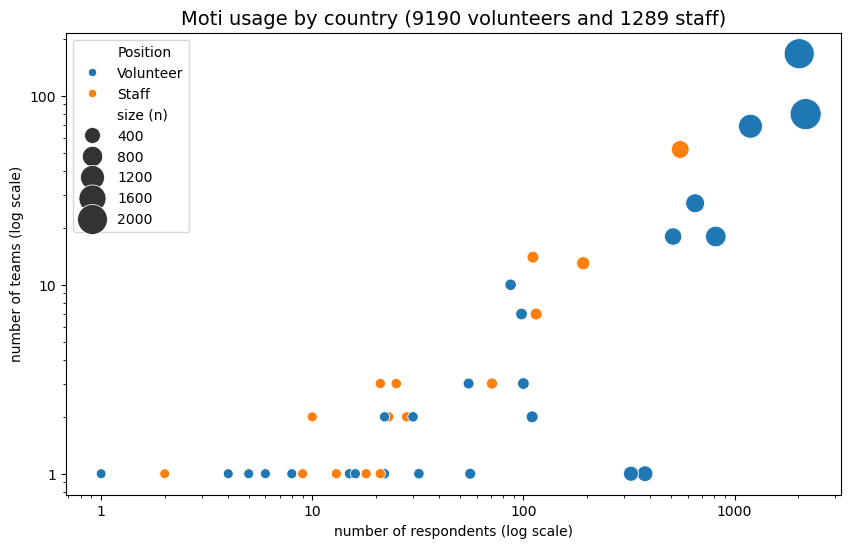

In [12]:
# SNS SCATTER PLOT COMPARING TEAM SIZES FOR STAFF AND VOLUNTEER - BY COUNTRY

# Read appropriate dataframe as defined in cell 2
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)
   
# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the bubble graph with Seaborn.objects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='size (n)', y='nTeams', size='size (n)', hue='Position',
                sizes=(50, 500))

# Set both axes to a log scale
plt.xscale('log')
plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('number of respondents (log scale)')
plt.ylabel('number of teams (log scale)')
plt.title(f'Moti usage by country ({n_vol} volunteers and {n_staff} staff)', fontsize=14)

# Show the legend
plt.legend()

# Save and show the plot
plt.savefig('Moti_by_country.png')
plt.show()

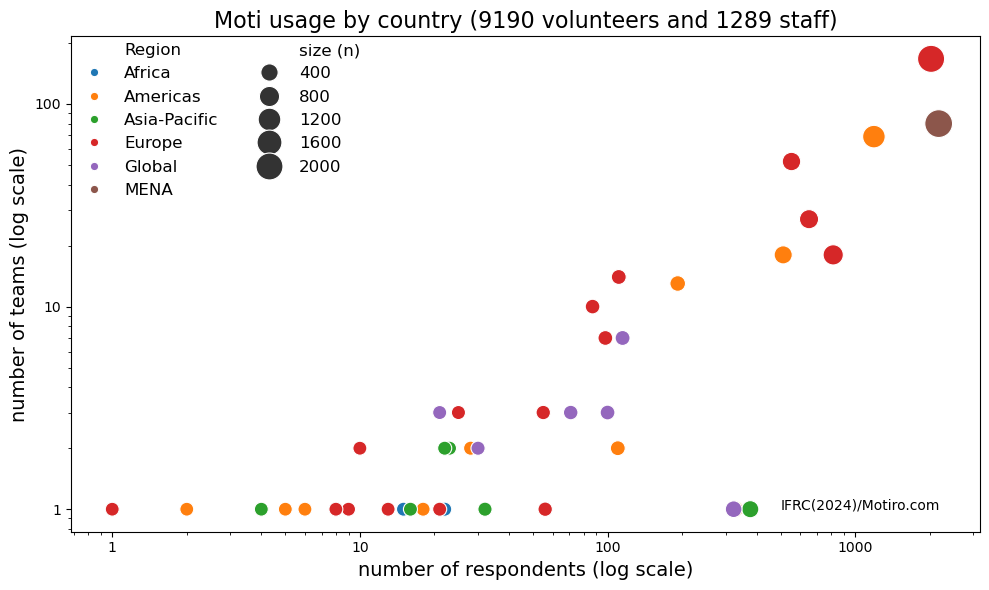

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter

# Read appropriate dataframe as defined in cell 13
file_path = 'Country.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)

# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size (n)', y='nTeams', hue='Region', size='size (n)', sizes=(100, 400))

# Set both axes to a log scale
plt.xscale('log')
plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('number of respondents (log scale)', fontsize=14)
plt.ylabel('number of teams (log scale)', fontsize=14)
plt.title(f'Moti usage by country ({n_vol} volunteers and {n_staff} staff)', fontsize=16)
plt.text(500, 1, "IFRC(2024)/Motiro.com")

# Customize the legend
legend = plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.,
                    ncol=2, frameon=False, facecolor=None, fontsize='large')
#legend.set_title("Countries")

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

# Save and show the plot
plt.savefig('Moti_by_country.png')
plt.show()


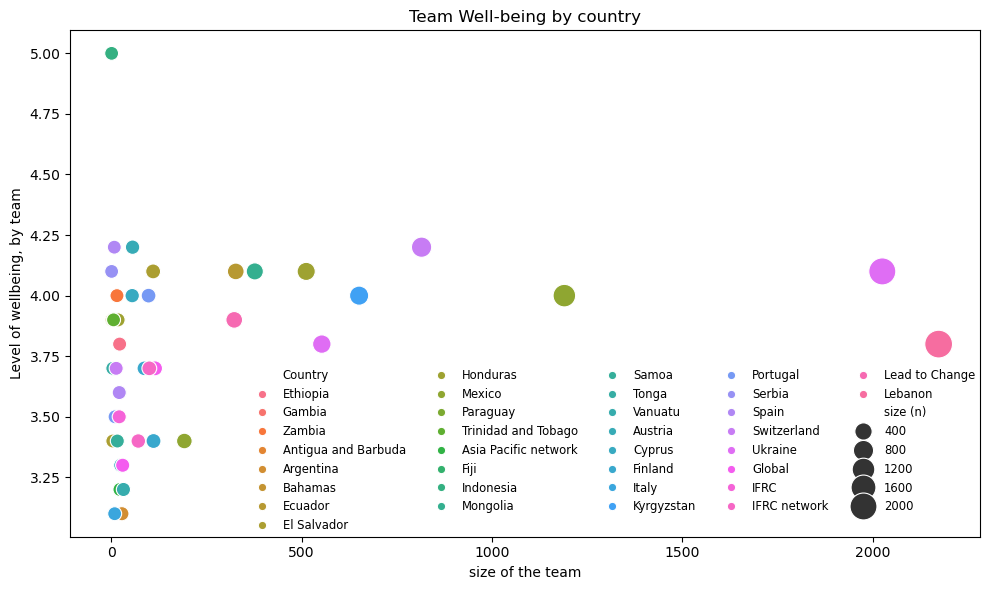

In [14]:
#Team well-being by team size

# Read appropriate dataframe as defined in cell 13
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)

# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create Well-being column
df['Well-being'] = df['Well-being_mean']

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size (n)', y='Well-being', hue='Country', size='size (n)', sizes=(100, 400))

# Set both axes to a log scale
#plt.xscale('log')
#plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('size of the team')
plt.ylabel('Level of wellbeing, by team')
plt.title('Team Well-being by country')

# Customize the legend
legend = plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=0.,
                    ncol=5, frameon=False, facecolor=None, fontsize='small')
#legend.set_title("Countries")

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

# Save and show the plot
plt.savefig('Well-being_by_country.png')
plt.show()


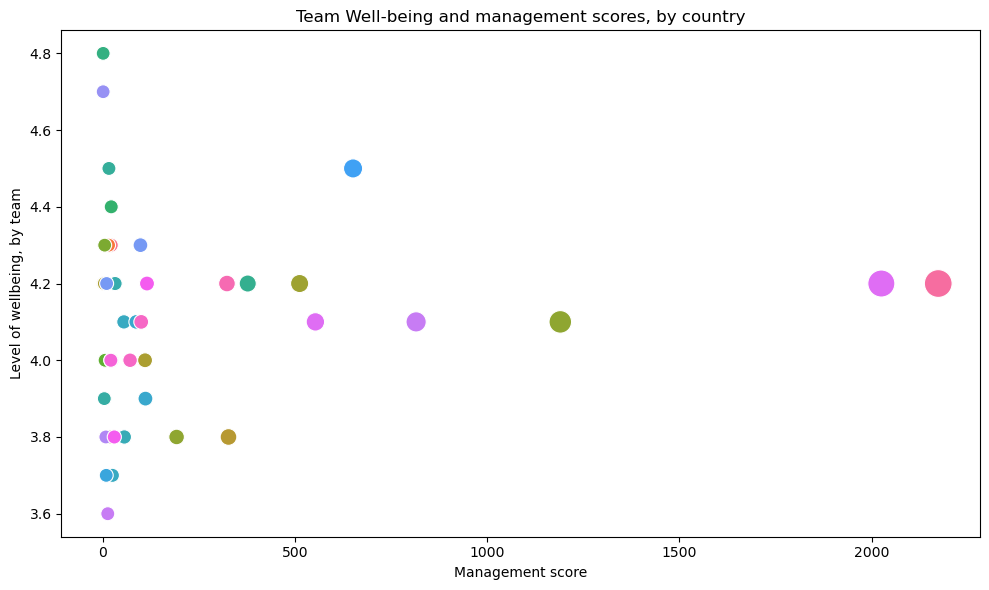

In [15]:
#Team well-being by management scores

# Read appropriate dataframe as defined in cell 13
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#Drop non RC, unknown and test responses
df = df.drop(df[df.Country == 'corporate'].index)
df = df.drop(df[df.Country == 'test'].index)
df = df.drop(df[df.Country == 'DK'].index)

# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create Management column
df['Management'] = df['Management_mean']

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size (n)', y='Management',
                hue='Country', size='size (n)', sizes=(100, 400),
                legend=False)

# Set both axes to a log scale
#plt.xscale('log')
#plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('Management score')
plt.ylabel('Level of wellbeing, by team')
plt.title('Team Well-being and management scores, by country')

# Customize the legend
#legend = plt.legend(bbox_to_anchor=(0,1), loc='upper left', borderaxespad=0.,
#                    ncol=6, frameon=False, facecolor=None, fontsize='small')
#legend.set_title("Countries")

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

# Save and show the plot
plt.savefig('Well-being_by_country.png')
plt.show()
